# goals here
- [ ] figure out the distance between the holes from the station json file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [3]:
# read in RNO_array.json
station_data = pd.read_json('RNO_array.json')

Text(0, 0.5, 'Y Position (m)')

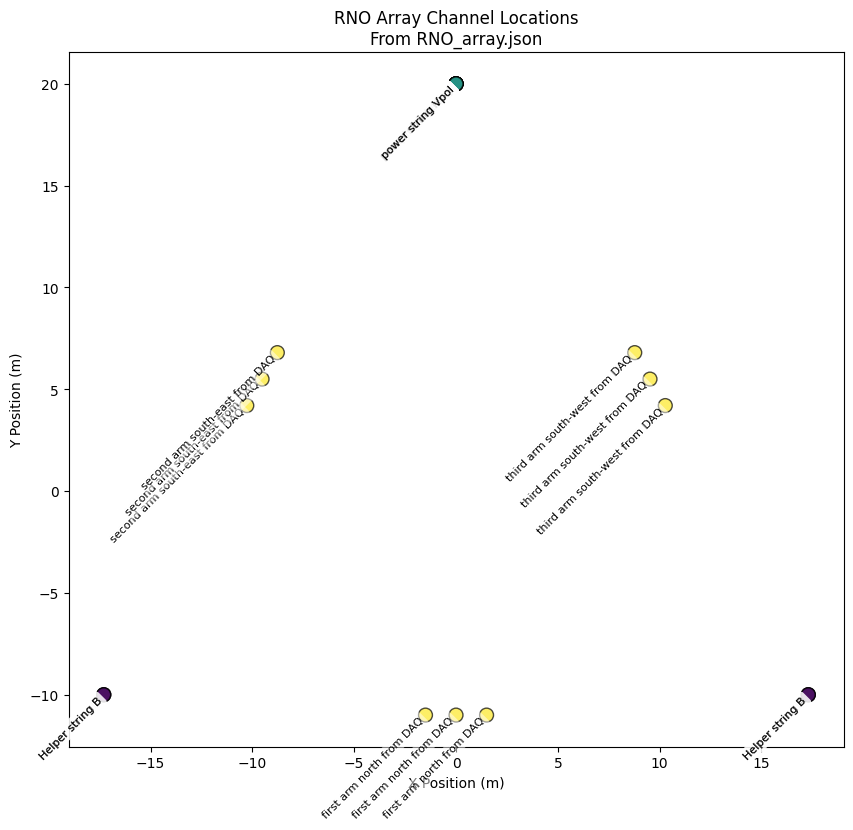

In [37]:
# plot the locations in 2d of the channels
# the json file has a 'channels' key with a list of dictionaries which include 'ant_position_x', 'ant_position_y', and 'ant_position_z'
channels = station_data['channels'][:24]
x = [channel['ant_position_x'] for channel in channels]
y = [channel['ant_position_y'] for channel in channels]
z = [channel['ant_position_z'] for channel in channels]
names = [channel['ant_comment'] for channel in channels]
# remove anything after the comma in the names
names = [name.split(',')[0] for name in names]

plt.figure(figsize=(10, 10))
plt.scatter(x, y, c=z, cmap='viridis', s=100, edgecolors='k', alpha=0.7)

# plot the names without overlapping
for i, name in enumerate(names):
    plt.text(x[i], y[i], name, fontsize=8, ha='right', va='top', rotation=45, color='black', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.25'))
plt.axis('equal')
# make the plot square
plt.gca().set_aspect('equal', adjustable='box')

plt.title('RNO Array Channel Locations\nFrom RNO_array.json')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
# plt.savefig('RNO_array_channel_locations.png', dpi=600, bbox_inches='tight')

In [42]:
# find the horizontal distance between power string (channel 4) and helper string B (channel 10)
power_string = channels[4]
helper_string_B = channels[10]
distance = ((power_string['ant_position_x'] - helper_string_B['ant_position_x'])**2 +
            (power_string['ant_position_y'] - helper_string_B['ant_position_y'])**2)**0.5
print(f"Distance between power string and helper string B: {distance:.2f} m")

Distance between power string and helper string B: 34.63 m
